# Problem Statement:
The goal of this project is to develop a predictive model for Insurance Claim Fraud Detection using machine learning techniques. Given a dataset containing information about insurance policies, customer details, and accident-related data, the objective is to predict whether an insurance claim is fraudulent or not.

### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df=pd.read_csv('insurance_fraud.csv')

In [3]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [5]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [6]:
df.shape

(1000, 40)

            The dataset contains 1000 rows and 40 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [9]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

        The data set contains object and int64 data, it contains no null except for a column _c39 which contains only Null Values

In [10]:
df.drop(['policy_number','incident_location','_c39'],axis=1,inplace=True)

In [11]:
df.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

        Dropped irrelevant columns as they contain only unique values

### Simple Imputer

Some Columns contain ? and it needs to be addressed

In [12]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values='?',strategy="most_frequent")

In [14]:
l=['police_report_available','collision_type','property_damage']
for i in l:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

### EDA

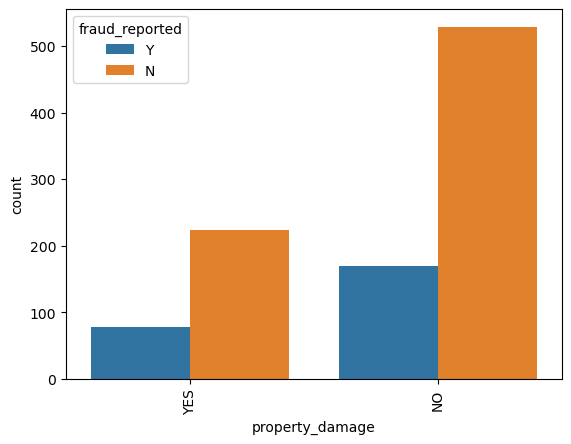

In [15]:
sns.countplot(x='property_damage', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

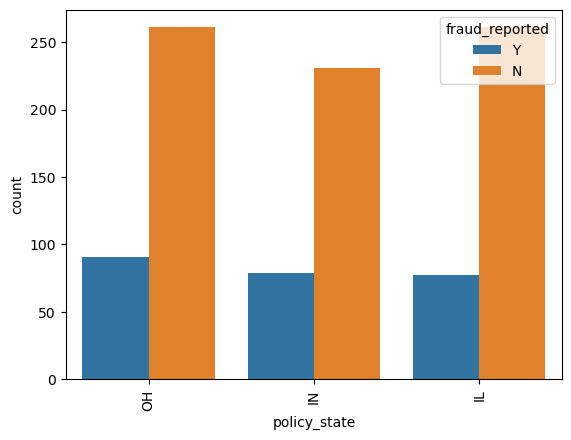

In [17]:
sns.countplot(x='policy_state', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

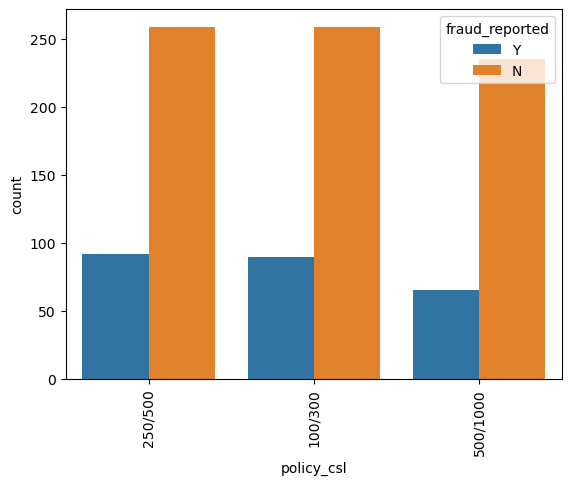

In [18]:
sns.countplot(x='policy_csl', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

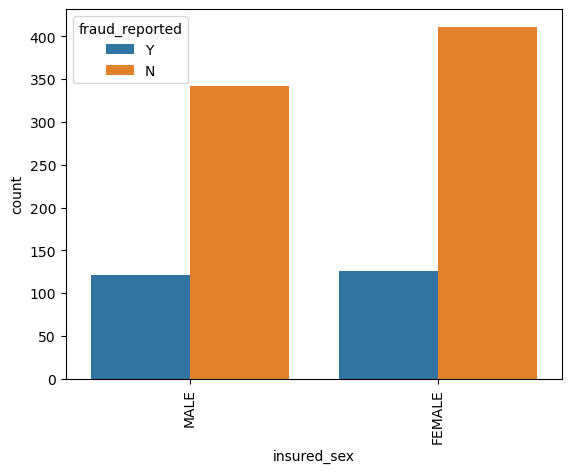

In [20]:
sns.countplot(x='insured_sex', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

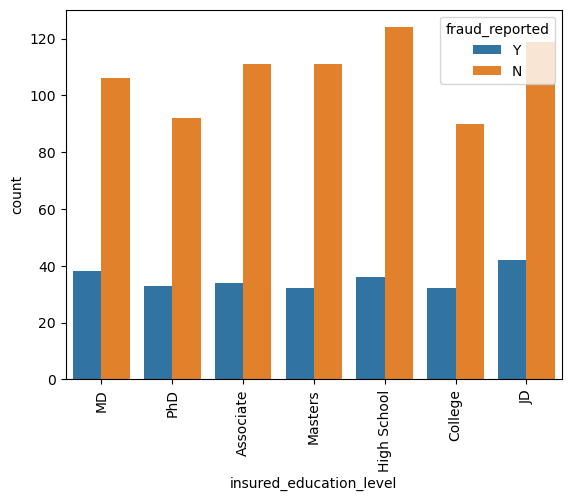

In [22]:
sns.countplot(x='insured_education_level', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

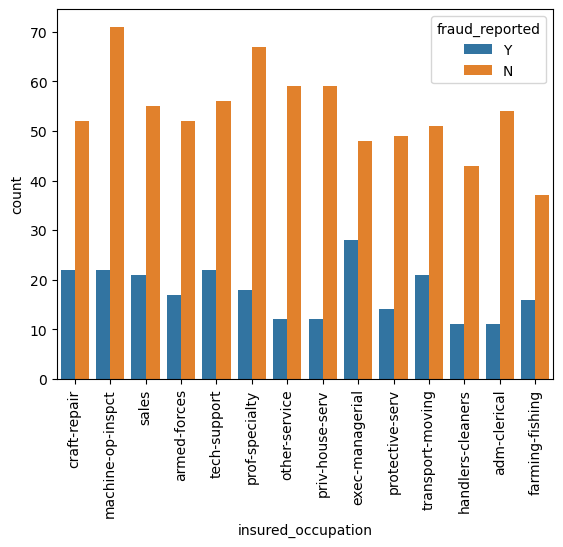

In [23]:
sns.countplot(x='insured_occupation', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

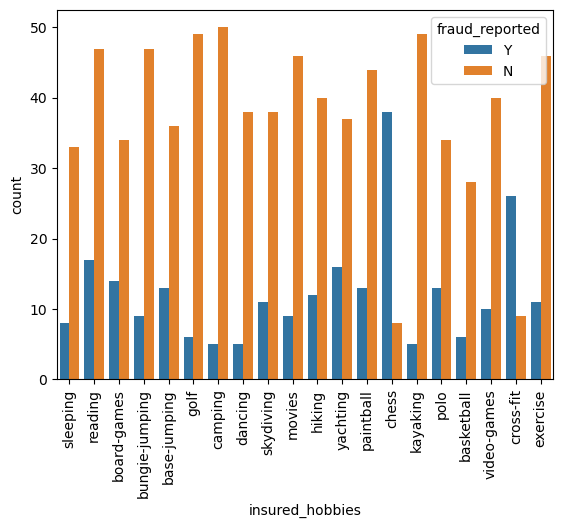

In [24]:
sns.countplot(x='insured_hobbies', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

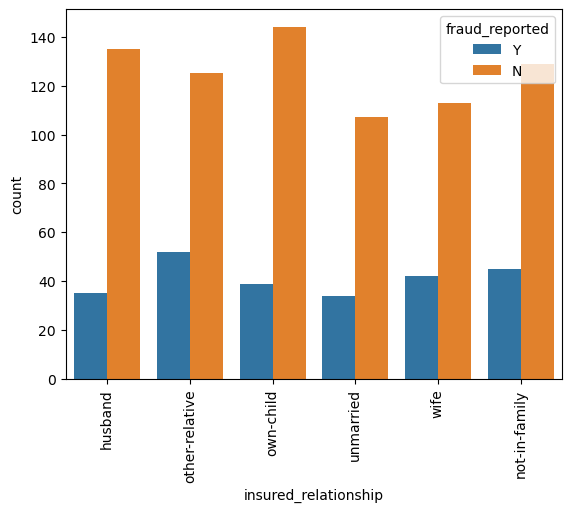

In [25]:
sns.countplot(x='insured_relationship', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

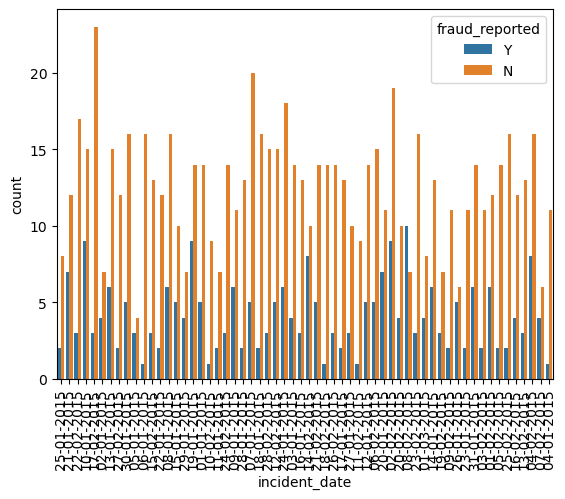

In [26]:
sns.countplot(x='incident_date', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

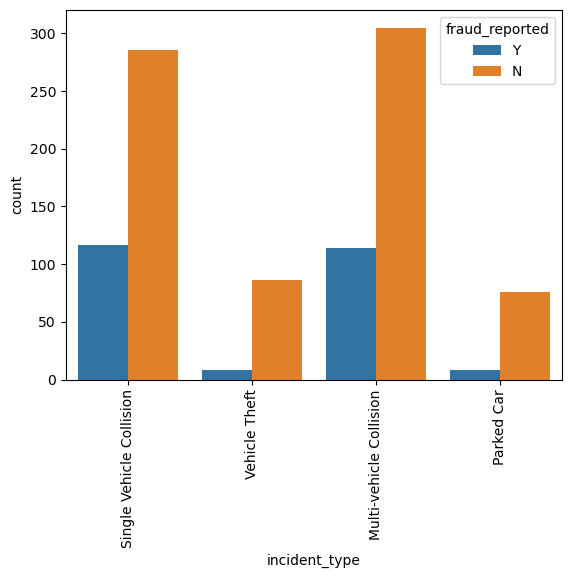

In [28]:
sns.countplot(x='incident_type', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

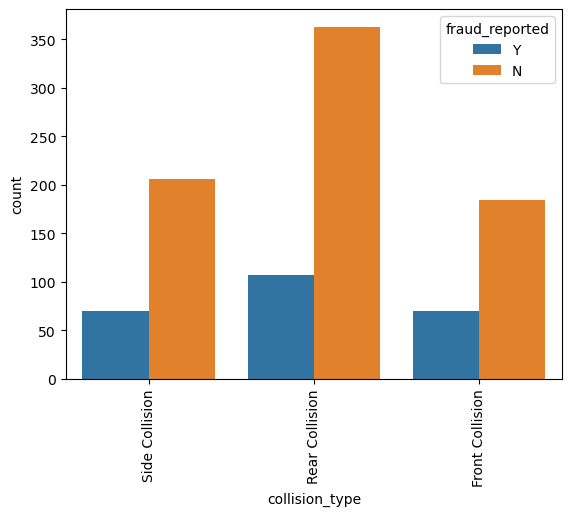

In [29]:
sns.countplot(x='collision_type', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

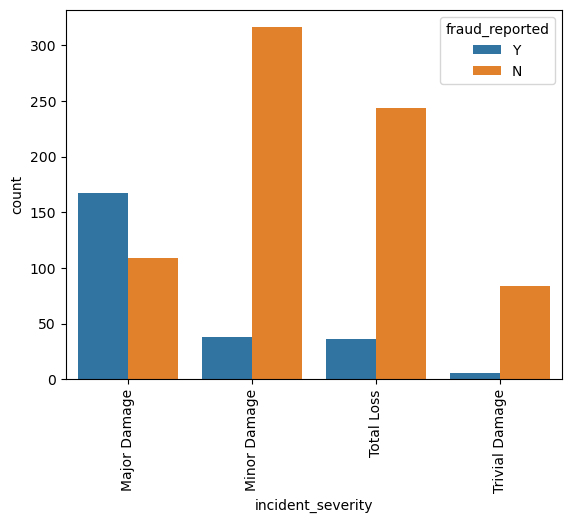

In [30]:
sns.countplot(x='incident_severity', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

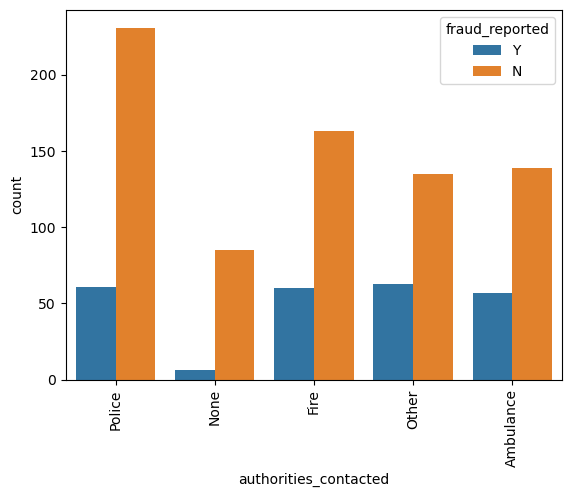

In [32]:
sns.countplot(x='authorities_contacted', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

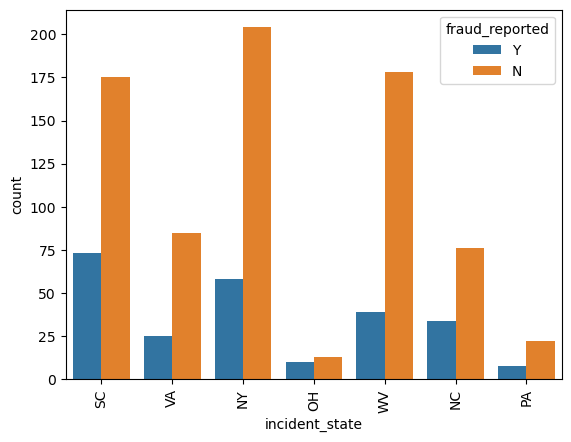

In [33]:
sns.countplot(x='incident_state', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

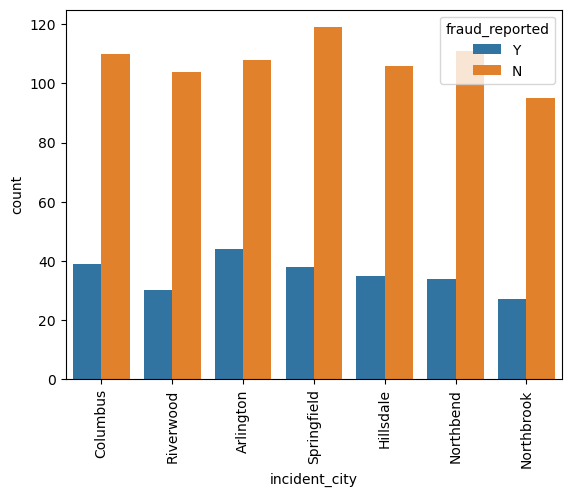

In [34]:
sns.countplot(x='incident_city', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

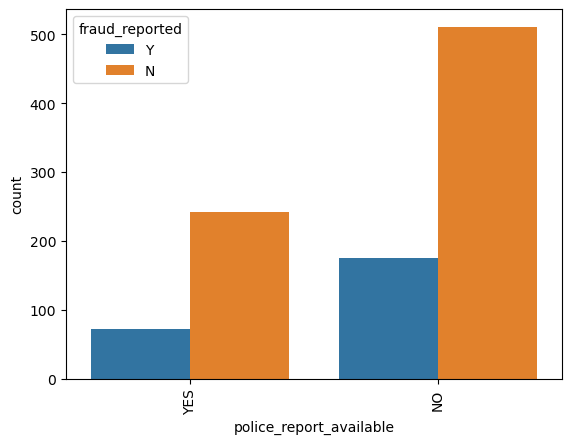

In [35]:
sns.countplot(x='police_report_available', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

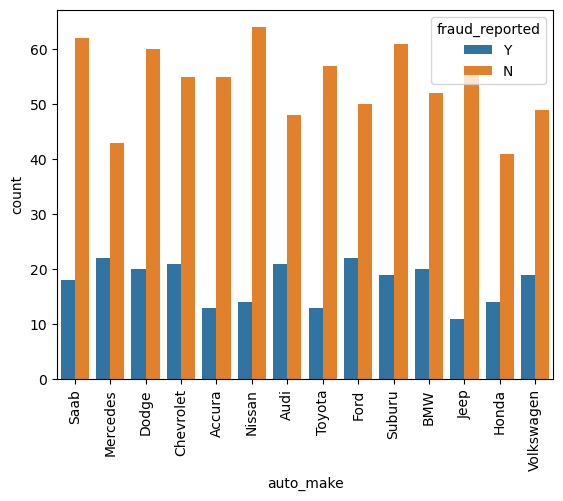

In [37]:
sns.countplot(x='auto_make', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

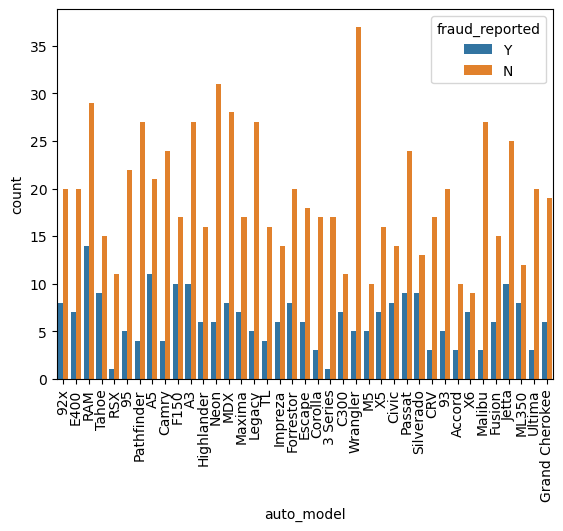

In [38]:
sns.countplot(x='auto_model', hue='fraud_reported', data=df)
plt.xticks(rotation=90)
plt.show()

### Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [42]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [43]:
lobject=['policy_bind_date', 'policy_state',
       'policy_csl','policy_annual_premium',
       'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage','police_report_available',
       'auto_make', 'auto_model', 'fraud_reported']

In [44]:
for i in lobject:
    df[i]=le.fit_transform(df[i])

In [45]:
df["policy_bind_date"]=le.fit_transform(df["policy_bind_date"])

In [47]:
df["incident_date"]=le.fit_transform(df["incident_date"])

In [48]:
df.dtypes

months_as_customer             int64
age                            int64
policy_bind_date               int64
policy_state                   int32
policy_csl                     int32
policy_deductable              int64
policy_annual_premium          int64
umbrella_limit                 int64
insured_zip                    int64
insured_sex                    int32
insured_education_level        int32
insured_occupation             int32
insured_hobbies                int32
insured_relationship           int32
capital-gains                  int64
capital-loss                   int64
incident_date                  int32
incident_type                  int32
collision_type                 int32
incident_severity              int32
authorities_contacted          int32
incident_state                 int32
incident_city                  int32
incident_hour_of_the_day       int64
number_of_vehicles_involved    int64
property_damage                int32
bodily_injuries                int64
w

                *****Label Encoding done Sucessfully*****

### Descriptive Analysis

In [49]:
df.describe()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,474.332000,1.01400,0.951000,1136.000000,495.735000,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,29.376000,1.172000,1.022000,1.184000,2.167000,3.242000,2.966000,11.644000,1.83900,0.302000,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,275.402851,0.83096,0.804516,611.864673,285.876467,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,17.249875,1.081474,0.728043,0.939695,1.532142,2.155942,2.044266,6.951373,1.01888,0.459355,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.000000,0.00000,0.000000,500.000000,0.000000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,233.750000,0.00000,0.000000,500.000000,247.750000,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,14.750000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,472.500000,1.00000,1.000000,1000.000000,496.500000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,29.500000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,12.000000,1.00000,0.000000,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,713.250000,2.00000,2.000000,2000.000000,742.250000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,44.000000,2.000000,2.000000,2.000000,4.000000,5.000000,5.000000,17.000000,3.00000,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,950.000000,2.00000,2.000000,2000.000000,990.000000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,59.000000,3.000000,2.000000,3.000000,4.000000,6.000000,6.000000,23.000000,4.00000,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


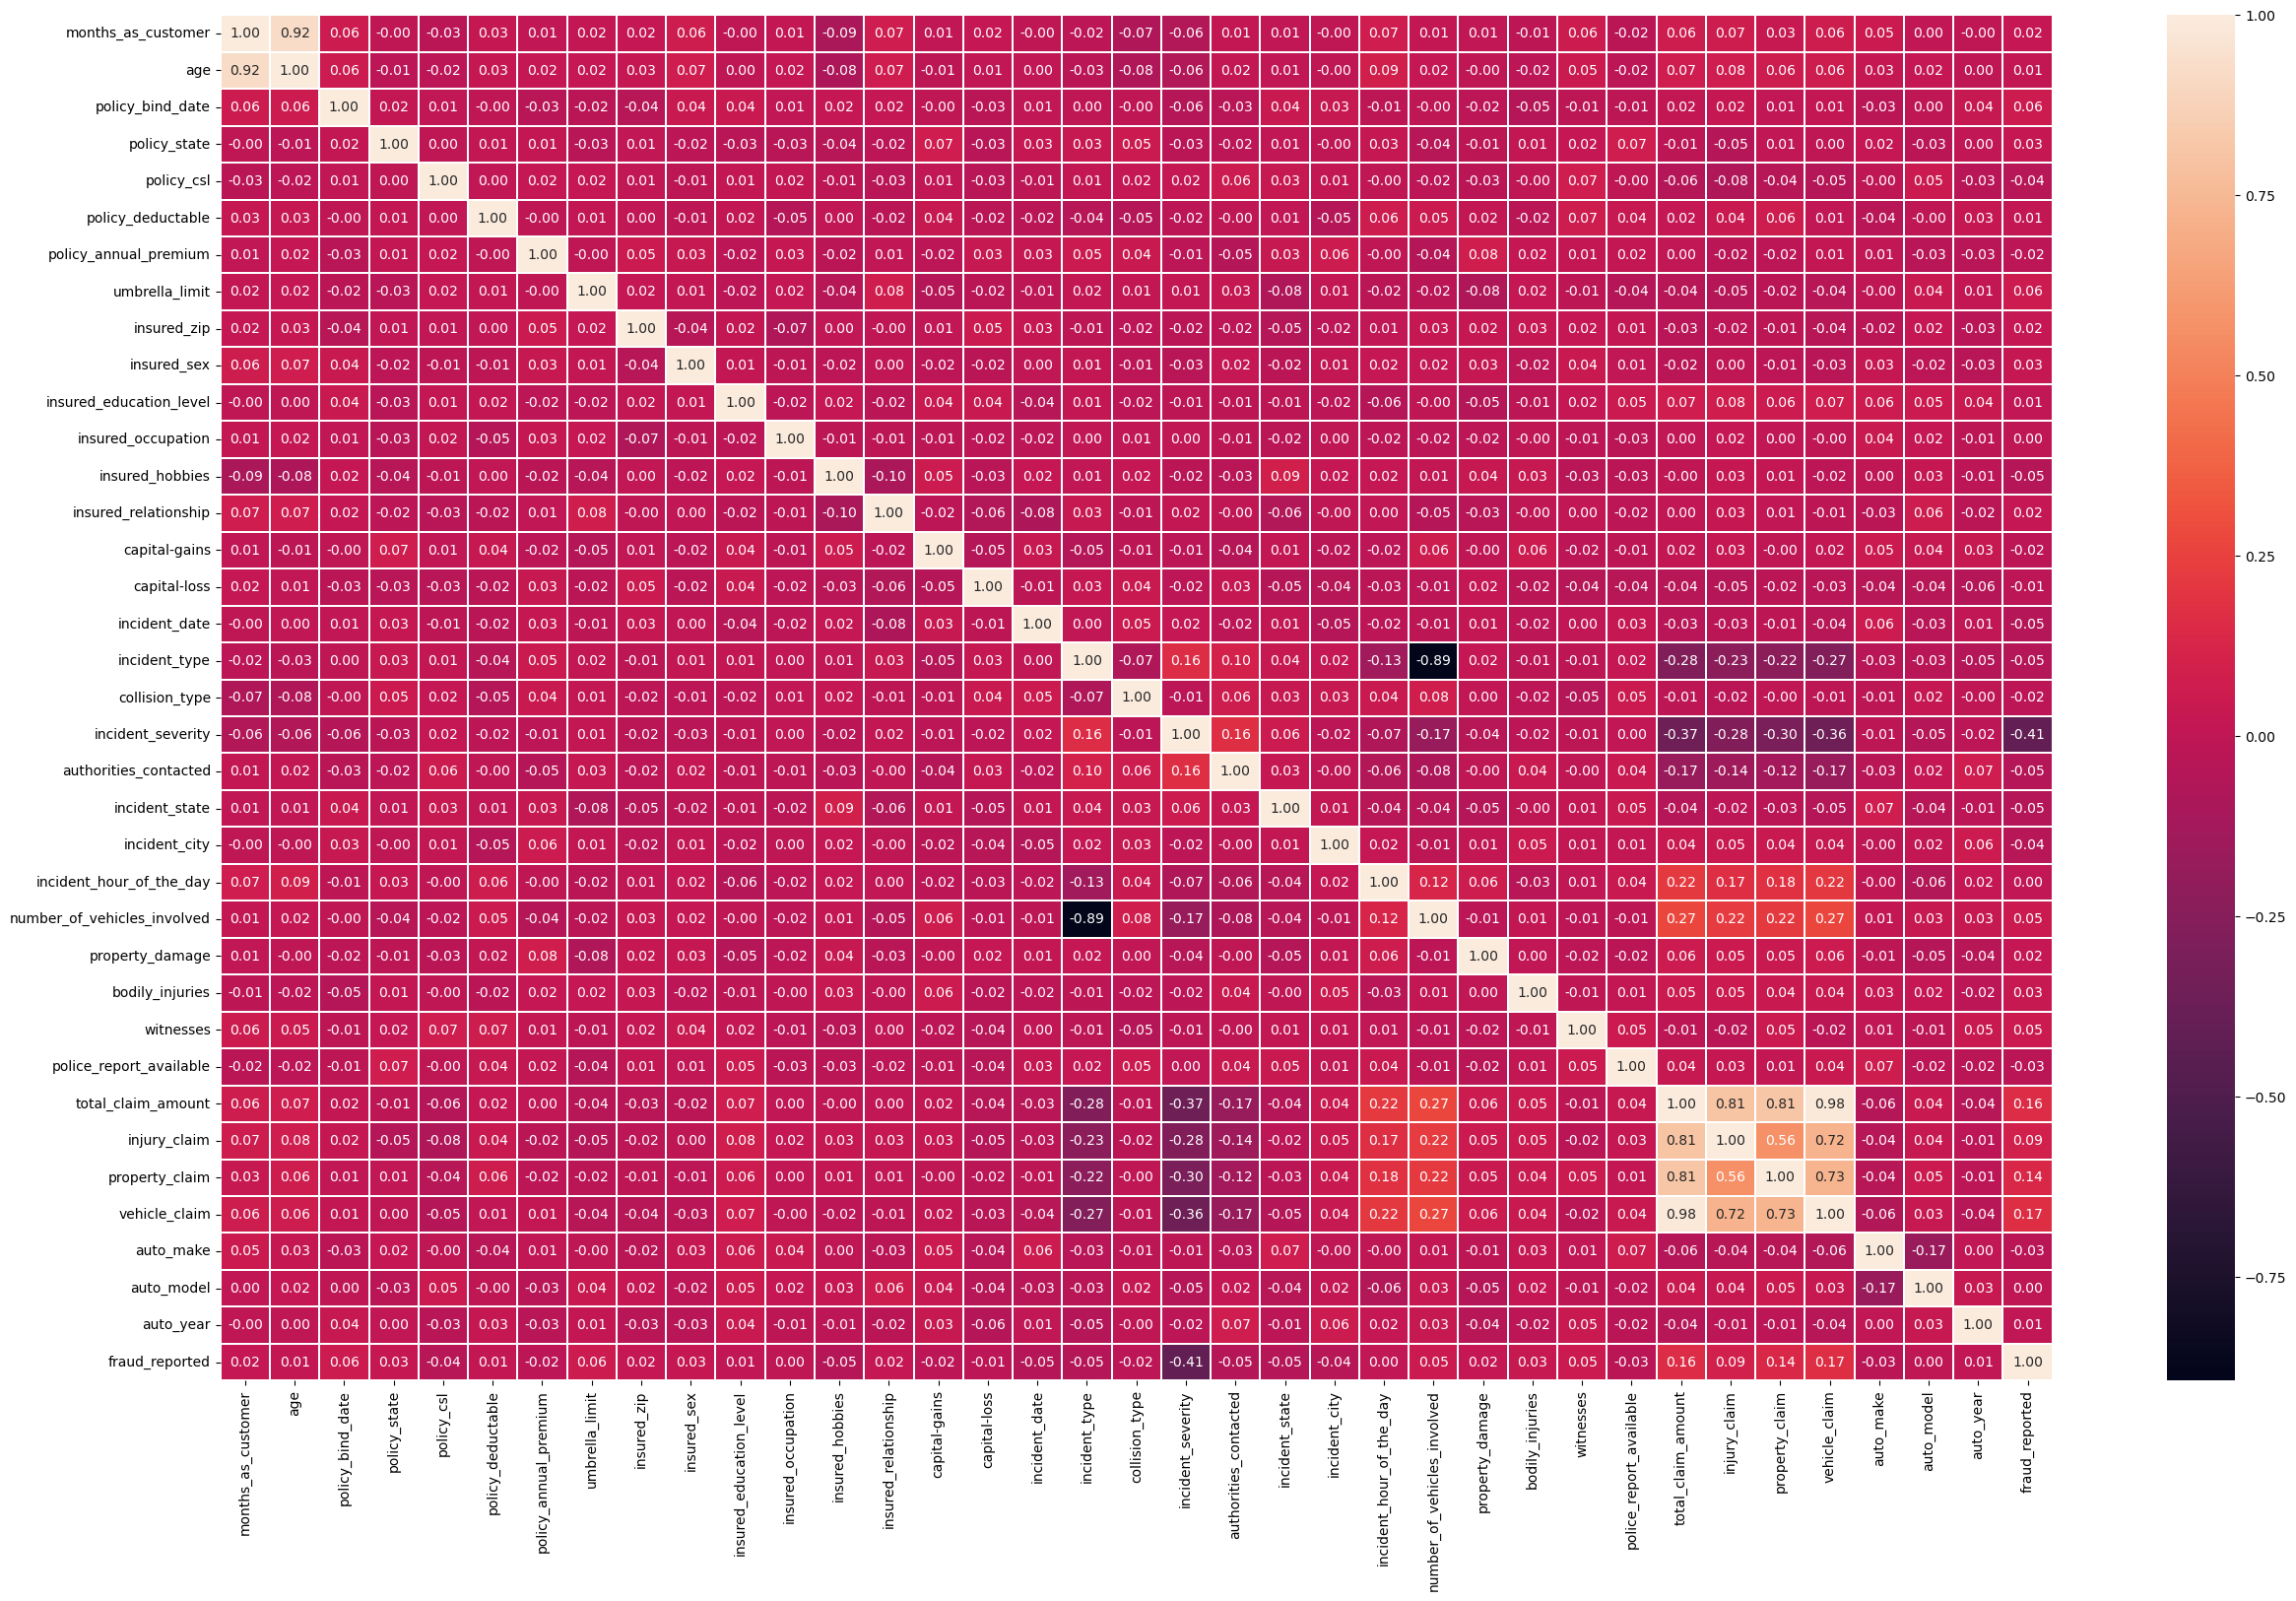

In [50]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

In [51]:
df.corr()["fraud_reported"].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
incident_date                 -0.047726
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
police_report_available       -0.027768
auto_make                     -0.027519
capital-gains                 -0.019173
collision_type                -0.017315
policy_annual_premium         -0.015261
capital-loss                  -0.014863
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
property_damage                0.017202
insured_zip                    0.019368
months_as_customer             0.020544
insured_relationship           0.021043


        Droping columns which very less corealtions

In [52]:
df.drop(["auto_model","insured_occupation","auto_year"],axis=1,inplace=True)

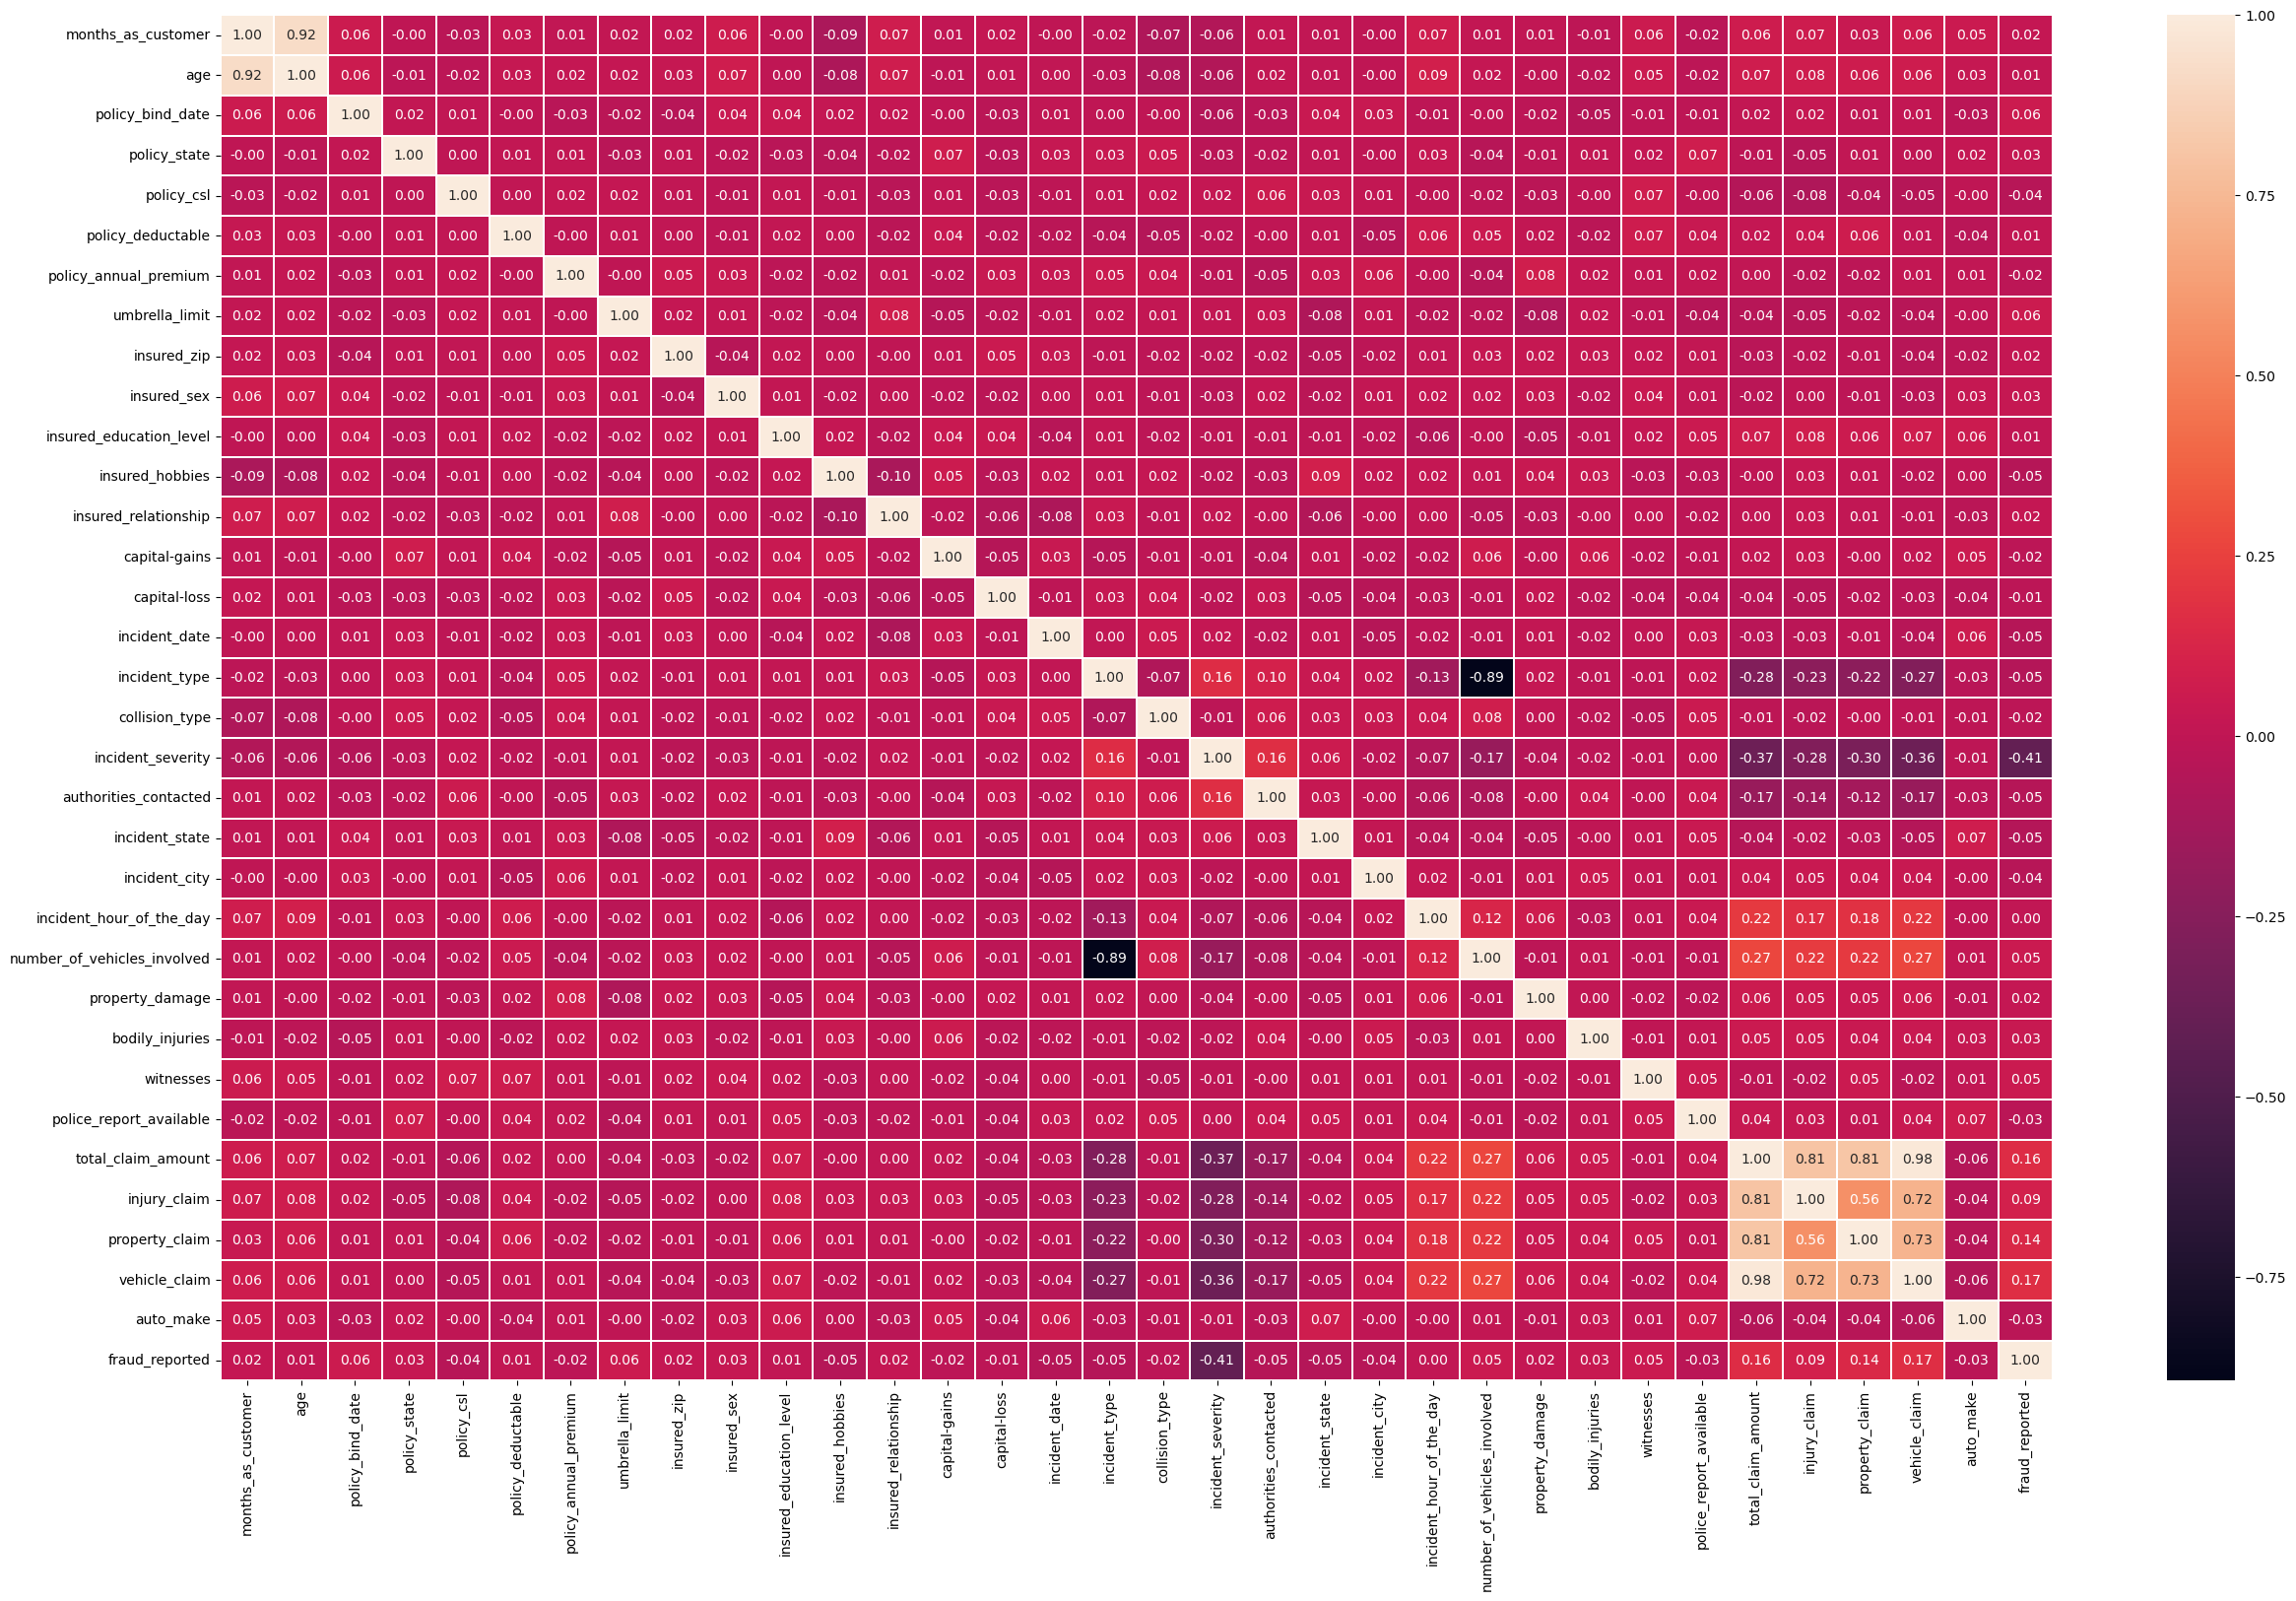

In [53]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

                Multicolinearity and skewness are present

In [54]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["Variables"]=x1.columns
    vif["VIF factor"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [56]:
x=df.drop(["fraud_reported"],axis=1)
y=df["fraud_reported"]

In [57]:
calc_vif(x)

,Variables,VIF factor
0,months_as_customer,23.585174
1,age,100.532657
2,policy_bind_date,3.983106
3,policy_state,2.541987
4,policy_csl,2.440105
5,policy_deductable,4.526032
6,policy_annual_premium,4.126734
7,umbrella_limit,1.265354
8,insured_zip,38.104060
9,insured_sex,1.907927


            To remove Multicolinearity we will drop further more columns

In [58]:
df.drop(["age","injury_claim","property_claim","total_claim_amount"],axis=1,inplace=True)

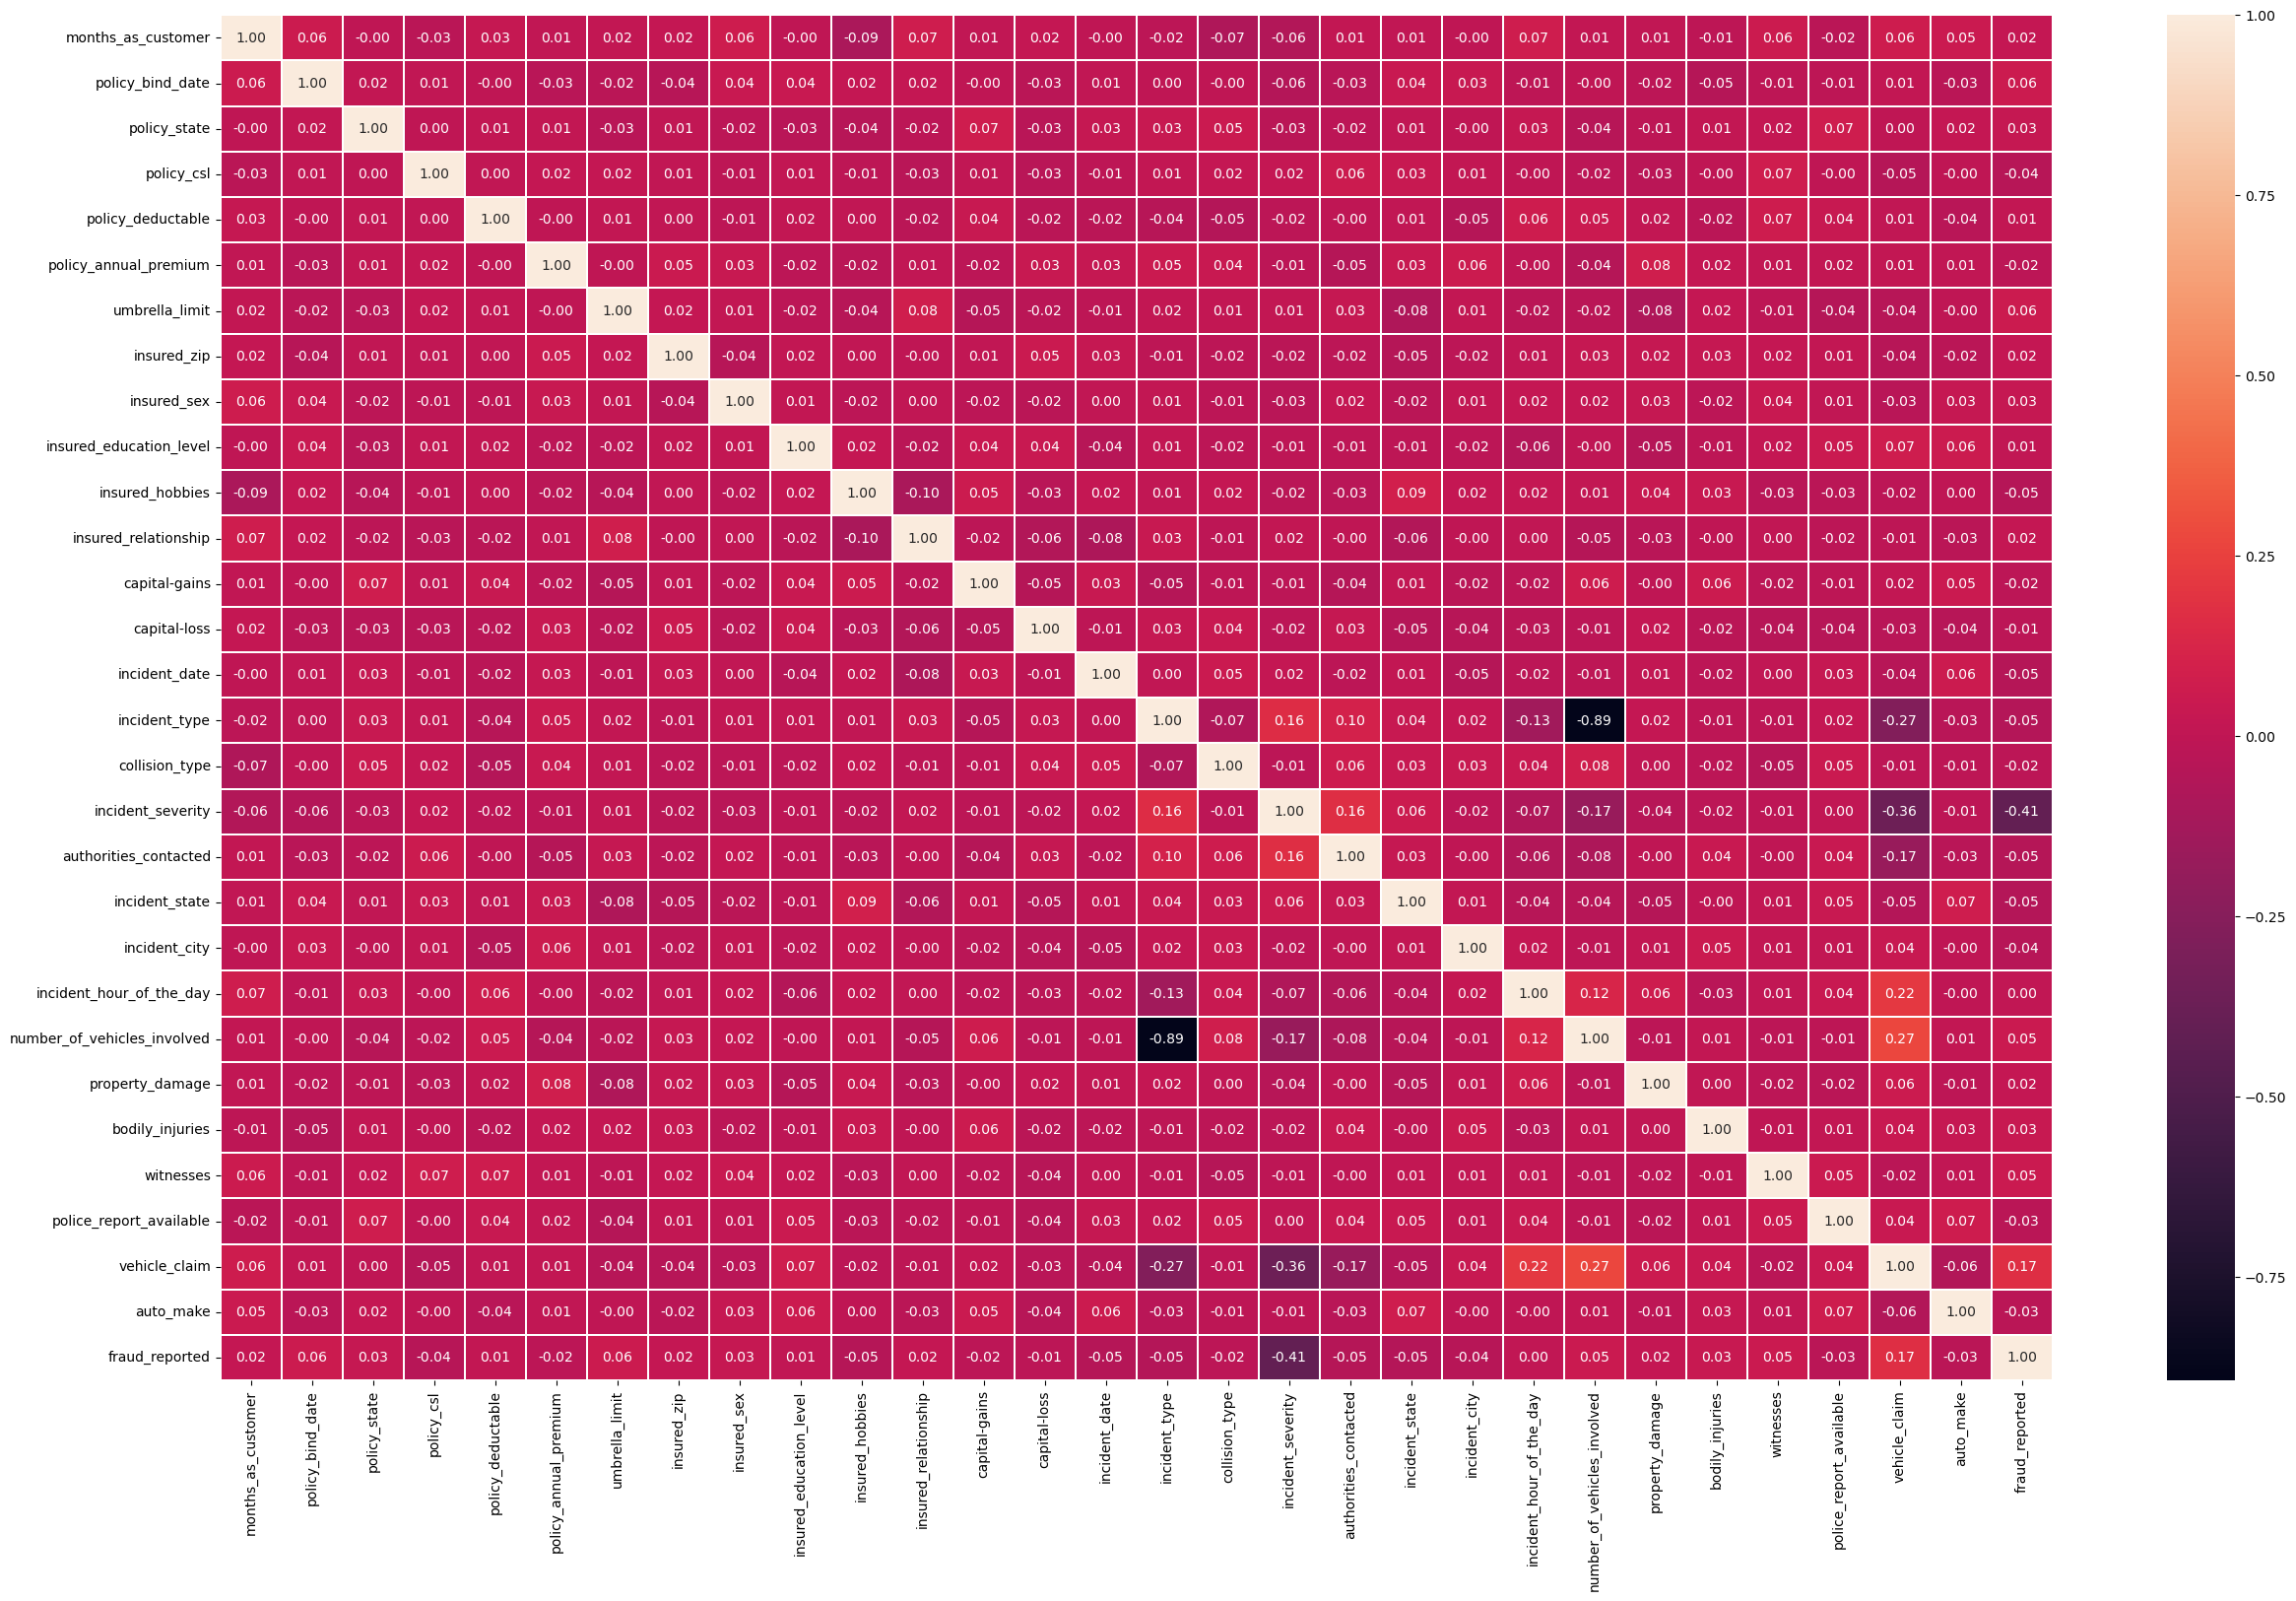

In [59]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

### Handling Outliers

In [61]:
from scipy.stats import zscore
z=np.abs(zscore(df))
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 503, 657, 700, 807,
        875, 922, 975], dtype=int64),
 array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 13,  6,  6,  6],
       dtype=int64))

In [62]:
dfnew=df[(z<3).all(axis=1)]
dfnew.shape

(984, 30)

                Outliers Managed, 1.6% Data Lost

### Managing Skewness

In [63]:
dfnew.skew().sort_values()

vehicle_claim                 -0.622288
capital-loss                  -0.375432
incident_state                -0.153565
authorities_contacted         -0.115082
insured_hobbies               -0.062887
policy_state                  -0.036107
incident_hour_of_the_day      -0.035669
collision_type                -0.032636
auto_make                     -0.029342
policy_annual_premium         -0.000306
policy_bind_date               0.002291
incident_date                  0.003550
insured_education_level        0.004744
bodily_injuries                0.007491
witnesses                      0.019974
incident_city                  0.046998
insured_relationship           0.079423
incident_type                  0.089173
policy_csl                     0.094102
insured_sex                    0.142856
incident_severity              0.281148
months_as_customer             0.365250
capital-gains                  0.466667
policy_deductable              0.480814
number_of_vehicles_involved    0.512032


In [64]:
from sklearn.preprocessing import power_transform

In [65]:
x=dfnew.drop(["fraud_reported"],axis=1)
y=dfnew["fraud_reported"]

In [66]:
x=power_transform(x,method='yeo-johnson')

In [67]:
dfnew.skew().sort_values()

vehicle_claim                 -0.622288
capital-loss                  -0.375432
incident_state                -0.153565
authorities_contacted         -0.115082
insured_hobbies               -0.062887
policy_state                  -0.036107
incident_hour_of_the_day      -0.035669
collision_type                -0.032636
auto_make                     -0.029342
policy_annual_premium         -0.000306
policy_bind_date               0.002291
incident_date                  0.003550
insured_education_level        0.004744
bodily_injuries                0.007491
witnesses                      0.019974
incident_city                  0.046998
insured_relationship           0.079423
incident_type                  0.089173
policy_csl                     0.094102
insured_sex                    0.142856
incident_severity              0.281148
months_as_customer             0.365250
capital-gains                  0.466667
policy_deductable              0.480814
number_of_vehicles_involved    0.512032


                Skewness has been Managed

### Scaling the Data

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dfx=sc.fit_transform(x)
dfx.mean()

-4.3574775286661594e-18

### Spliting of Train and Test Data and Model Selection

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)

### 1. KNeighbors Classifiers

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
model_selection(knn)

at random state 0,  accuracy score is 0.7331081081081081
at random state 0, confusion matrix is [[205  16]
 [ 63  12]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.76      0.93      0.84       221
           1       0.43      0.16      0.23        75

    accuracy                           0.73       296
   macro avg       0.60      0.54      0.54       296
weighted avg       0.68      0.73      0.69       296



at random state 1,  accuracy score is 0.7533783783783784
at random state 1, confusion matrix is [[211  24]
 [ 49  12]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.81      0.90      0.85       235
           1       0.33      0.20      0.25        61

    accuracy                           0.75       296
   macro avg       0.57      0.55      0.55       296
weighted avg       0.71      0.75      0.73       296



at random state 

at random state 18,  accuracy score is 0.7432432432432432
at random state 18, confusion matrix is [[214  23]
 [ 53   6]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.80      0.90      0.85       237
           1       0.21      0.10      0.14        59

    accuracy                           0.74       296
   macro avg       0.50      0.50      0.49       296
weighted avg       0.68      0.74      0.71       296



at random state 19,  accuracy score is 0.7094594594594594
at random state 19, confusion matrix is [[193  26]
 [ 60  17]]
at random state 19, classification report is               precision    recall  f1-score   support

           0       0.76      0.88      0.82       219
           1       0.40      0.22      0.28        77

    accuracy                           0.71       296
   macro avg       0.58      0.55      0.55       296
weighted avg       0.67      0.71      0.68       296



at random 

at random state 36,  accuracy score is 0.7432432432432432
at random state 36, confusion matrix is [[207  21]
 [ 55  13]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.79      0.91      0.84       228
           1       0.38      0.19      0.25        68

    accuracy                           0.74       296
   macro avg       0.59      0.55      0.55       296
weighted avg       0.70      0.74      0.71       296



at random state 37,  accuracy score is 0.7331081081081081
at random state 37, confusion matrix is [[207  12]
 [ 67  10]]
at random state 37, classification report is               precision    recall  f1-score   support

           0       0.76      0.95      0.84       219
           1       0.45      0.13      0.20        77

    accuracy                           0.73       296
   macro avg       0.61      0.54      0.52       296
weighted avg       0.68      0.73      0.67       296



at random 

at random state 54,  accuracy score is 0.7195945945945946
at random state 54, confusion matrix is [[202  15]
 [ 68  11]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       0.75      0.93      0.83       217
           1       0.42      0.14      0.21        79

    accuracy                           0.72       296
   macro avg       0.59      0.54      0.52       296
weighted avg       0.66      0.72      0.66       296



at random state 55,  accuracy score is 0.722972972972973
at random state 55, confusion matrix is [[198  35]
 [ 47  16]]
at random state 55, classification report is               precision    recall  f1-score   support

           0       0.81      0.85      0.83       233
           1       0.31      0.25      0.28        63

    accuracy                           0.72       296
   macro avg       0.56      0.55      0.55       296
weighted avg       0.70      0.72      0.71       296



at random s

at random state 72,  accuracy score is 0.706081081081081
at random state 72, confusion matrix is [[193  23]
 [ 64  16]]
at random state 72, classification report is               precision    recall  f1-score   support

           0       0.75      0.89      0.82       216
           1       0.41      0.20      0.27        80

    accuracy                           0.71       296
   macro avg       0.58      0.55      0.54       296
weighted avg       0.66      0.71      0.67       296



at random state 73,  accuracy score is 0.7398648648648649
at random state 73, confusion matrix is [[209  20]
 [ 57  10]]
at random state 73, classification report is               precision    recall  f1-score   support

           0       0.79      0.91      0.84       229
           1       0.33      0.15      0.21        67

    accuracy                           0.74       296
   macro avg       0.56      0.53      0.53       296
weighted avg       0.68      0.74      0.70       296



at random s

at random state 90,  accuracy score is 0.6858108108108109
at random state 90, confusion matrix is [[196  17]
 [ 76   7]]
at random state 90, classification report is               precision    recall  f1-score   support

           0       0.72      0.92      0.81       213
           1       0.29      0.08      0.13        83

    accuracy                           0.69       296
   macro avg       0.51      0.50      0.47       296
weighted avg       0.60      0.69      0.62       296



at random state 91,  accuracy score is 0.75
at random state 91, confusion matrix is [[211  19]
 [ 55  11]]
at random state 91, classification report is               precision    recall  f1-score   support

           0       0.79      0.92      0.85       230
           1       0.37      0.17      0.23        66

    accuracy                           0.75       296
   macro avg       0.58      0.54      0.54       296
weighted avg       0.70      0.75      0.71       296



at random state 92,  acc

                        CV Score

In [71]:
score=cross_val_score(knn,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.75634518 0.75126904 0.72588832 0.76649746 0.70918367]
0.7418367346938776
0.021110134378866073


### 2. Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 0.7837837837837838
at random state 0, confusion matrix is [[190  31]
 [ 33  42]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.85      0.86      0.86       221
           1       0.58      0.56      0.57        75

    accuracy                           0.78       296
   macro avg       0.71      0.71      0.71       296
weighted avg       0.78      0.78      0.78       296



at random state 1,  accuracy score is 0.8040540540540541
at random state 1, confusion matrix is [[198  37]
 [ 21  40]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.90      0.84      0.87       235
           1       0.52      0.66      0.58        61

    accuracy                           0.80       296
   macro avg       0.71      0.75      0.73       296
weighted avg       0.82      0.80      0.81       296



at random state 

at random state 21, classification report is               precision    recall  f1-score   support

           0       0.84      0.87      0.86       218
           1       0.60      0.54      0.57        78

    accuracy                           0.78       296
   macro avg       0.72      0.71      0.71       296
weighted avg       0.78      0.78      0.78       296



at random state 22,  accuracy score is 0.7466216216216216
at random state 22, confusion matrix is [[176  39]
 [ 36  45]]
at random state 22, classification report is               precision    recall  f1-score   support

           0       0.83      0.82      0.82       215
           1       0.54      0.56      0.55        81

    accuracy                           0.75       296
   macro avg       0.68      0.69      0.68       296
weighted avg       0.75      0.75      0.75       296



at random state 23,  accuracy score is 0.793918918918919
at random state 23, confusion matrix is [[192  30]
 [ 31  43]]
at random s

at random state 43, classification report is               precision    recall  f1-score   support

           0       0.83      0.83      0.83       222
           1       0.49      0.49      0.49        74

    accuracy                           0.74       296
   macro avg       0.66      0.66      0.66       296
weighted avg       0.74      0.74      0.74       296



at random state 44,  accuracy score is 0.7364864864864865
at random state 44, confusion matrix is [[176  36]
 [ 42  42]]
at random state 44, classification report is               precision    recall  f1-score   support

           0       0.81      0.83      0.82       212
           1       0.54      0.50      0.52        84

    accuracy                           0.74       296
   macro avg       0.67      0.67      0.67       296
weighted avg       0.73      0.74      0.73       296



at random state 45,  accuracy score is 0.8074324324324325
at random state 45, confusion matrix is [[203  33]
 [ 24  36]]
at random 

at random state 67,  accuracy score is 0.7736486486486487
at random state 67, confusion matrix is [[194  33]
 [ 34  35]]
at random state 67, classification report is               precision    recall  f1-score   support

           0       0.85      0.85      0.85       227
           1       0.51      0.51      0.51        69

    accuracy                           0.77       296
   macro avg       0.68      0.68      0.68       296
weighted avg       0.77      0.77      0.77       296



at random state 68,  accuracy score is 0.7668918918918919
at random state 68, confusion matrix is [[186  40]
 [ 29  41]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.87      0.82      0.84       226
           1       0.51      0.59      0.54        70

    accuracy                           0.77       296
   macro avg       0.69      0.70      0.69       296
weighted avg       0.78      0.77      0.77       296



at random 

at random state 89,  accuracy score is 0.7871621621621622
at random state 89, confusion matrix is [[189  33]
 [ 30  44]]
at random state 89, classification report is               precision    recall  f1-score   support

           0       0.86      0.85      0.86       222
           1       0.57      0.59      0.58        74

    accuracy                           0.79       296
   macro avg       0.72      0.72      0.72       296
weighted avg       0.79      0.79      0.79       296



at random state 90,  accuracy score is 0.7162162162162162
at random state 90, confusion matrix is [[165  48]
 [ 36  47]]
at random state 90, classification report is               precision    recall  f1-score   support

           0       0.82      0.77      0.80       213
           1       0.49      0.57      0.53        83

    accuracy                           0.72       296
   macro avg       0.66      0.67      0.66       296
weighted avg       0.73      0.72      0.72       296



at random 

                CV Score for Decision Tree Classifier

In [73]:
score=cross_val_score(dtc,dfx,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.76829268 0.74390244 0.73780488 0.76219512 0.80487805 0.79268293]
0.7682926829268294
0.02413484164032099


### 3. Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.7567567567567568
at random state 0, confusion matrix is [[205  16]
 [ 56  19]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.79      0.93      0.85       221
           1       0.54      0.25      0.35        75

    accuracy                           0.76       296
   macro avg       0.66      0.59      0.60       296
weighted avg       0.72      0.76      0.72       296



at random state 1,  accuracy score is 0.8006756756756757
at random state 1, confusion matrix is [[209  26]
 [ 33  28]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.86      0.89      0.88       235
           1       0.52      0.46      0.49        61

    accuracy                           0.80       296
   macro avg       0.69      0.67      0.68       296
weighted avg       0.79      0.80      0.80       296



at random state 

at random state 17,  accuracy score is 0.7668918918918919
at random state 17, confusion matrix is [[205   9]
 [ 60  22]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.77      0.96      0.86       214
           1       0.71      0.27      0.39        82

    accuracy                           0.77       296
   macro avg       0.74      0.61      0.62       296
weighted avg       0.76      0.77      0.73       296



at random state 18,  accuracy score is 0.8040540540540541
at random state 18, confusion matrix is [[209  28]
 [ 30  29]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.87      0.88      0.88       237
           1       0.51      0.49      0.50        59

    accuracy                           0.80       296
   macro avg       0.69      0.69      0.69       296
weighted avg       0.80      0.80      0.80       296



at random 

at random state 34,  accuracy score is 0.7905405405405406
at random state 34, confusion matrix is [[213  16]
 [ 46  21]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.82      0.93      0.87       229
           1       0.57      0.31      0.40        67

    accuracy                           0.79       296
   macro avg       0.69      0.62      0.64       296
weighted avg       0.76      0.79      0.77       296



at random state 35,  accuracy score is 0.8006756756756757
at random state 35, confusion matrix is [[205  27]
 [ 32  32]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.86      0.88      0.87       232
           1       0.54      0.50      0.52        64

    accuracy                           0.80       296
   macro avg       0.70      0.69      0.70       296
weighted avg       0.80      0.80      0.80       296



at random 

at random state 51,  accuracy score is 0.7804054054054054
at random state 51, confusion matrix is [[208  17]
 [ 48  23]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.81      0.92      0.86       225
           1       0.57      0.32      0.41        71

    accuracy                           0.78       296
   macro avg       0.69      0.62      0.64       296
weighted avg       0.76      0.78      0.76       296



at random state 52,  accuracy score is 0.7837837837837838
at random state 52, confusion matrix is [[206  18]
 [ 46  26]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.82      0.92      0.87       224
           1       0.59      0.36      0.45        72

    accuracy                           0.78       296
   macro avg       0.70      0.64      0.66       296
weighted avg       0.76      0.78      0.76       296



at random 

at random state 68,  accuracy score is 0.7905405405405406
at random state 68, confusion matrix is [[213  13]
 [ 49  21]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.81      0.94      0.87       226
           1       0.62      0.30      0.40        70

    accuracy                           0.79       296
   macro avg       0.72      0.62      0.64       296
weighted avg       0.77      0.79      0.76       296



at random state 69,  accuracy score is 0.793918918918919
at random state 69, confusion matrix is [[216  10]
 [ 51  19]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.81      0.96      0.88       226
           1       0.66      0.27      0.38        70

    accuracy                           0.79       296
   macro avg       0.73      0.61      0.63       296
weighted avg       0.77      0.79      0.76       296



at random s

at random state 85,  accuracy score is 0.7871621621621622
at random state 85, confusion matrix is [[216   8]
 [ 55  17]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.80      0.96      0.87       224
           1       0.68      0.24      0.35        72

    accuracy                           0.79       296
   macro avg       0.74      0.60      0.61       296
weighted avg       0.77      0.79      0.75       296



at random state 86,  accuracy score is 0.7905405405405406
at random state 86, confusion matrix is [[212  21]
 [ 41  22]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.84      0.91      0.87       233
           1       0.51      0.35      0.42        63

    accuracy                           0.79       296
   macro avg       0.67      0.63      0.64       296
weighted avg       0.77      0.79      0.78       296



at random 

                CV Score for Random Forest Classifier

In [76]:
score=cross_val_score(rf,dfx,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.78658537 0.73780488 0.7804878  0.76219512 0.7804878  0.79268293]
0.7733739837398375
0.018433289783757186


### 4. Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model_selection(lg)

at random state 0,  accuracy score is 0.7736486486486487
at random state 0, confusion matrix is [[203  18]
 [ 49  26]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.81      0.92      0.86       221
           1       0.59      0.35      0.44        75

    accuracy                           0.77       296
   macro avg       0.70      0.63      0.65       296
weighted avg       0.75      0.77      0.75       296



at random state 1,  accuracy score is 0.7905405405405406
at random state 1, confusion matrix is [[201  34]
 [ 28  33]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.88      0.86      0.87       235
           1       0.49      0.54      0.52        61

    accuracy                           0.79       296
   macro avg       0.69      0.70      0.69       296
weighted avg       0.80      0.79      0.79       296



at random state 

at random state 17,  accuracy score is 0.7871621621621622
at random state 17, confusion matrix is [[200  14]
 [ 49  33]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.80      0.93      0.86       214
           1       0.70      0.40      0.51        82

    accuracy                           0.79       296
   macro avg       0.75      0.67      0.69       296
weighted avg       0.78      0.79      0.77       296



at random state 18,  accuracy score is 0.8175675675675675
at random state 18, confusion matrix is [[208  29]
 [ 25  34]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.89      0.88      0.89       237
           1       0.54      0.58      0.56        59

    accuracy                           0.82       296
   macro avg       0.72      0.73      0.72       296
weighted avg       0.82      0.82      0.82       296



at random 

at random state 34,  accuracy score is 0.793918918918919
at random state 34, confusion matrix is [[208  21]
 [ 40  27]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.84      0.91      0.87       229
           1       0.56      0.40      0.47        67

    accuracy                           0.79       296
   macro avg       0.70      0.66      0.67       296
weighted avg       0.78      0.79      0.78       296



at random state 35,  accuracy score is 0.793918918918919
at random state 35, confusion matrix is [[203  29]
 [ 32  32]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.86      0.88      0.87       232
           1       0.52      0.50      0.51        64

    accuracy                           0.79       296
   macro avg       0.69      0.69      0.69       296
weighted avg       0.79      0.79      0.79       296



at random st

at random state 53,  accuracy score is 0.777027027027027
at random state 53, confusion matrix is [[194  19]
 [ 47  36]]
at random state 53, classification report is               precision    recall  f1-score   support

           0       0.80      0.91      0.85       213
           1       0.65      0.43      0.52        83

    accuracy                           0.78       296
   macro avg       0.73      0.67      0.69       296
weighted avg       0.76      0.78      0.76       296



at random state 54,  accuracy score is 0.7398648648648649
at random state 54, confusion matrix is [[198  19]
 [ 58  21]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       0.77      0.91      0.84       217
           1       0.53      0.27      0.35        79

    accuracy                           0.74       296
   macro avg       0.65      0.59      0.60       296
weighted avg       0.71      0.74      0.71       296



at random s

at random state 71, confusion matrix is [[199  20]
 [ 53  24]]
at random state 71, classification report is               precision    recall  f1-score   support

           0       0.79      0.91      0.85       219
           1       0.55      0.31      0.40        77

    accuracy                           0.75       296
   macro avg       0.67      0.61      0.62       296
weighted avg       0.73      0.75      0.73       296



at random state 72,  accuracy score is 0.7601351351351351
at random state 72, confusion matrix is [[192  24]
 [ 47  33]]
at random state 72, classification report is               precision    recall  f1-score   support

           0       0.80      0.89      0.84       216
           1       0.58      0.41      0.48        80

    accuracy                           0.76       296
   macro avg       0.69      0.65      0.66       296
weighted avg       0.74      0.76      0.75       296



at random state 73,  accuracy score is 0.7905405405405406
at random 

at random state 89, classification report is               precision    recall  f1-score   support

           0       0.83      0.86      0.85       222
           1       0.53      0.47      0.50        74

    accuracy                           0.76       296
   macro avg       0.68      0.67      0.67       296
weighted avg       0.76      0.76      0.76       296



at random state 90,  accuracy score is 0.7466216216216216
at random state 90, confusion matrix is [[193  20]
 [ 55  28]]
at random state 90, classification report is               precision    recall  f1-score   support

           0       0.78      0.91      0.84       213
           1       0.58      0.34      0.43        83

    accuracy                           0.75       296
   macro avg       0.68      0.62      0.63       296
weighted avg       0.72      0.75      0.72       296



at random state 91,  accuracy score is 0.7905405405405406
at random state 91, confusion matrix is [[202  28]
 [ 34  32]]
at random 

                CV Score for Logistic Regression

In [78]:
score=cross_val_score(lg,dfx,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.79268293 0.77439024 0.77439024 0.75       0.79268293 0.77439024]
0.7764227642276423
0.014372089048507076


         For Model Building we will use Decision Tree Clasifier as it gives best results

### Hyper Parameter Tuning

In [79]:
from sklearn.model_selection import GridSearchCV
dict= {'splitter':['best', 'random'],
             'max_depth' : [6,7,8],
             'criterion': ['gini','entropy','log_loss'],
              'max_features':['auto','sqrt','log2']}
gd=GridSearchCV(estimator=dtc,param_grid=dict,cv=6)

In [80]:
gd.fit(dfx,y)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [81]:
gd.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [82]:
gd.best_score_

0.7835365853658537

### Building the Final Model

In [83]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=6,max_features='sqrt',splitter='best')
instance=dtc
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=36,test_size=0.30)
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)
print(f"at random state {37},  accuracy score is {accuracy_score(y_test,pred_test)}")
print(f"at random state {37}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
print(f"at random state {37}, classification report is {classification_report(y_test,pred_test)}")

at random state 37,  accuracy score is 0.7364864864864865
at random state 37, confusion matrix is [[194  34]
 [ 44  24]]
at random state 37, classification report is               precision    recall  f1-score   support

           0       0.82      0.85      0.83       228
           1       0.41      0.35      0.38        68

    accuracy                           0.74       296
   macro avg       0.61      0.60      0.61       296
weighted avg       0.72      0.74      0.73       296



### Model Saving

In [85]:
import pickle
filename="insurance.pkl"
pickle.dump(dtc,open(filename,'wb'))

### AUC ROC

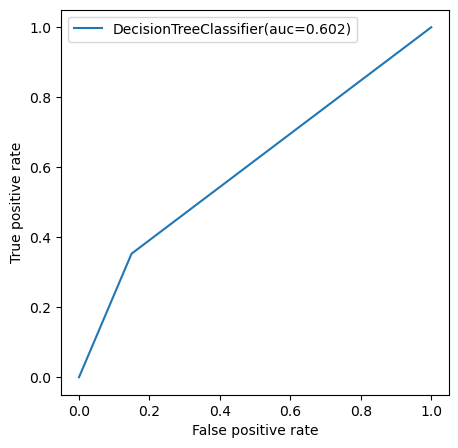

In [87]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,threshold=roc_curve(y_test,pred_test)
auc=auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='DecisionTreeClassifier(auc=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

### Prediction

In [89]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred_test})
dfpred.sample(25)

,Expected,Predicted
693,0,0
83,0,0
325,0,0
351,1,1
130,0,0
215,1,0
991,0,0
994,0,0
183,1,0
512,0,0


### Conclusion - The Model has been built successfully